**[Python Course Home Page](https://www.kaggle.com/learn/python)**

---

In [1]:
import keras
import tensorflow as tf
import numpy as np
import time
import numpy as np
from sklearn.datasets import fetch_california_housing

print(tf.__version__)

E:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.7.0


In [7]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

mnist = read_data_sets("MNIST_data/", one_hot=True)
print(type(mnist))

X_train.shape is  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
finished!
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructi

In [8]:
print('mnist.train.num_examples', mnist.train.num_examples)

mnist.train.num_examples 55000


In [9]:
import tensorflow as tf

n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "outputs")    

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

print('finished!')

finished!


In [11]:
n_epochs = 400
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        print('epoch is ', epoch)
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            print('X_batch.shape is ', X_batch.shape,
                  'y_batch.shape is ', y_batch.shape)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "./my_model_final.ckpt")
print('finished!')

epoch is  0
X_batch.shape is  (50, 784) y_batch.shape is  (50, 10)


InvalidArgumentError: labels must be 1-D, but got shape [50,10]
	 [[Node: loss_1/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT64, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dnn/outputs/add, _arg_y_0_1/_3)]]

Caused by op 'loss_1/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits', defined at:
  File "E:\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "E:\anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-4d27271cb03f>", line 31, in <module>
    labels=y, logits=logits)
  File "E:\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2052, in sparse_softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "E:\anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 7990, in sparse_softmax_cross_entropy_with_logits
    labels=labels, name=name)
  File "E:\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "E:\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "E:\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): labels must be 1-D, but got shape [50,10]
	 [[Node: loss_1/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT64, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dnn/outputs/add, _arg_y_0_1/_3)]]


In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.2191 - acc: 0.9349
Epoch 2/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0991 - acc: 0.96990s - loss: 0.0996 - acc: 0.96
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0718 - acc: 0.9775
Epoch 4/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0532 - acc: 0.9835
Epoch 5/5
10000/10000 [==============================] - 1s 69us/step


[0.0702136641963094, 0.9774]

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

print('finished!')

finished!


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

In [ ]:

n_epochs = 1000
learning_rate = 0.01
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)
init = tf.global_variables_initializer()
with tf.Session() as sess:
sess.run(init)
for epoch in range(n_epochs):
    
    

In [11]:
model = Sequential()
model.add(Embedding(1000, 4, input_length=10))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

NameError: name 'Sequential' is not defined

In [6]:
2*3600 + 46*60 + 40

10000

In [7]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
print(m, n)

20640 8


In [17]:
start_t = time.time()

housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
    theta_value = theta.eval()
    print('theta_value.shape is ', theta_value.shape)
print('theta_value is ', theta_value, 'cost time', time.time()-start_t)

b = np.array([[2,3],[4,5]])
print(np.linalg.inv(b))

b_t = tf.constant(b, dtype=tf.float32, name='b_t')
b_t = tf.matrix_inverse(b_t)
with tf.Session() as sess:
    b_t_value = b_t.eval()
    print('b_t_value is ', b_t_value)

theta_value.shape is  (9, 1)
theta_value is  [[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]] cost time 0.258164644241333
[[-2.5  1.5]
 [ 2.  -1. ]]
b_t_value is  [[-2.5  1.5]
 [ 2.  -1. ]]


In [15]:
start_t = time.time()

X = np.c_[np.ones((m, 1)), housing.data]
y = housing.target.reshape(-1, 1)
print(X.shape, y.shape)

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

# print('theta.shape is', theta.shape)
# X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
# y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
# XT = tf.transpose(X)
# theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
# with tf.Session() as sess:
#     theta_value = theta.eval()
#     print('theta_value.shape is ', theta_value.shape)

print('theta.shape is ', theta.shape, 'cost time', time.time()-start_t)
print('theta.value is ', theta)

(20640, 9) (20640, 1)
theta.shape is  (9, 1) cost time 0.003988027572631836
theta.value is  [[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [26]:
a = np.arange(1,5).reshape(2,2)

b = np.arange(5,9).reshape(2,2)

print(np.linalg.inv(np.dot(a,b)))

a = tf.constant(a, dtype=tf.float32, name='a')
b = tf.constant(b, dtype=tf.float32, name='b')
c = tf.matmul(a, b)
c_i = tf.matrix_inverse(c)
with tf.Session() as sess:
#     c_value = c.eval()
    c_i_value = c_i.eval()
    print('c_i_value is', c_i_value)

[[ 12.5   -5.5 ]
 [-10.75   4.75]]
c_i_value is [[ 12.499994   -5.4999976]
 [-10.749995    4.749998 ]]


In [4]:
graph = tf.Graph()

with graph.as_default():
    x2 = tf.Variable(2)
x2.graph is tf.get_default_graph()

False

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import json

import gensim

C:\anaconda3_py3.6\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
word2vec_filename = 'C:/Tencent_Word2Vec/Tencent_AILab_ChineseEmbedding/Tencent_AILab_ChineseEmbedding.txt'

with open(word2vec_filename, encoding='utf8') as file:
    line_cnt = 0
    for line in file:
        line_cnt += 1
        print('line num: ', line_cnt, 'line length is ', len(line.strip().split()), 'content: ', line)
        if line_cnt >=1:
            break

line num:  1 line length is  2 content:  8824330 200



In [19]:
start_t = time.time()

print('start loading')
wv_from_text = gensim.models.KeyedVectors.load_word2vec_format(word2vec_filename, binary=False)

def is_number(n):
    try:
        float(n) 
    except ValueError:
        return False
    return True
# is_number('-357t')

print('total cost time: ', time.time()-start_t)

start loading
total cost time:  3624.0401380062103


In [ ]:
wv_from_text.init_sims(replace=True)  # 神奇，很省内存，可以运算most_similar

In [23]:
def compute_ngrams(word, min_n, max_n):
    print('in compute_ngrams')
    start_t = time.time()
    #BOW, EOW = ('<', '>')  # Used by FastText to attach to all words as prefix and suffix
    extended_word =  word
    ngrams = []
    for ngram_length in range(min_n, min(len(extended_word), max_n) + 1):
        for i in range(0, len(extended_word) - ngram_length + 1):
            ngrams.append(extended_word[i:i + ngram_length])
    print('compute_ngrams ends cost time', time.time()-start_t)
    return list(set(ngrams))


def wordVec(word,wv_from_text,min_n = 1, max_n = 3):
    '''
    ngrams_single/ngrams_more,主要是为了当出现oov的情况下,最好先不考虑单字词向量
    '''
    print('in wordVec')
    start_t = time.time()
    # 确认词向量维度
    word_size = wv_from_text.wv.syn0[0].shape[0]   
    # 计算word的ngrams词组
    ngrams = compute_ngrams(word,min_n = min_n, max_n = max_n)
    # 如果在词典之中，直接返回词向量
    if word in wv_from_text.wv.vocab.keys():
        return wv_from_text[word]
    else:  
        # 不在词典的情况下
        word_vec = np.zeros(word_size, dtype=np.float32)
        ngrams_found = 0
        ngrams_single = [ng for ng in ngrams if len(ng) == 1]
        ngrams_more = [ng for ng in ngrams if len(ng) > 1]
        # 先只接受2个单词长度以上的词向量
        for ngram in ngrams_more:
            if ngram in wv_from_text.wv.vocab.keys():
                word_vec += wv_from_text[ngram]
                ngrams_found += 1
                #print(ngram)
        # 如果，没有匹配到，那么最后是考虑单个词向量
        if ngrams_found == 0:
            for ngram in ngrams_single:
                word_vec += wv_from_text[ngram]
                ngrams_found += 1
        print('wordVec ends cost time', time.time()-start_t)
        if word_vec.any():
            return word_vec / max(1, ngrams_found)
        else:
            raise KeyError('all ngrams for word %s absent from model' % word)

print('start WordVec')
vec = wordVec('千奇百怪的词向量',wv_from_text,min_n = 1, max_n = 3)  # 词向量获取
wv_from_text.most_similar(positive=[vec], topn=10)    # 相似词查找

print('finished!')

start WordVec
in wordVec
in compute_ngrams
compute_ngrams ends cost time 0.0
wordVec ends cost time 0.0


C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\anaconda3_py3.6\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


finished!


In [28]:
vec = wordVec('涂松高',wv_from_text,min_n = 1, max_n = 3)
wv_from_text.most_similar(positive=[vec], topn=20)

in wordVec
in compute_ngrams
compute_ngrams ends cost time 0.0
wordVec ends cost time 0.003957986831665039


C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\anaconda3_py3.6\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\anaconda3_py3.6\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('涂松', 0.7524598240852356),
 ('松高', 0.7524597644805908),
 ('芦峰', 0.5978732109069824),
 ('金粟', 0.56803297996521),
 ('菊初', 0.5661991834640503),
 ('胡秉言', 0.5600354671478271),
 ('摇岭', 0.5573152899742126),
 ('霜压', 0.5558995008468628),
 ('边桃', 0.5538754463195801),
 ('新秋', 0.5513023138046265),
 ('乡梅', 0.5504626035690308),
 ('风撼', 0.5489150881767273),
 ('霜经', 0.5486017465591431),
 ('蕉红', 0.5485155582427979),
 ('巾峰', 0.547770082950592),
 ('柳杨', 0.5457078218460083),
 ('祥北', 0.5453804731369019),
 ('金菊', 0.5448608994483948),
 ('夏月明', 0.5446022152900696),
 ('径竹', 0.5436645746231079)]

In [92]:
r = {'aaa': 3.0, 'bbb': 3.5}
r = json.dumps(r)
print(r, r[3:10])

{"aaa": 3.0, "bbb": 3.5} aa": 3.


In [82]:
# 使用post方式时，数据放在data或者body中，不能放在url中，放在url中将被忽略。

import time
import requests

print('start running')


def split_all_text(response_text):
    idx_right = -1
    outcome = {}

    while True:
        start_idx = idx_right + 1
        idx_left = response_text.find('"', start_idx)
        if idx_left==-1:
            break

        start_idx = idx_left + 1
        idx_right = response_text.find('"', start_idx)
        if idx_right==-1:
            break

        buy_user_id = response_text[idx_left+1:idx_right]

        start_idx = idx_right + 1
        idx_left = response_text.find('"', start_idx)
        if idx_left==-1:
            break

        start_idx = idx_left + 1
        idx_right = response_text.find('"', start_idx)
        if idx_right==-1:
            break

        score = float(response_text[idx_left+1:idx_right])
        outcome[buy_user_id] = score

    return outcome

#------------------------------------------------------------------------------

# files={'file':open('test.xls','rb')}
# # data = {'file': open('./model_outcome_formated.csv_bakup_2019-03-21', 'r')}
# # r = requests.post(url_post, data=data)
# r = requests.post(url_post, params=data)
# r = requests.post(url_post, files=data, headers={'Content-Type':'binary'})

#------------------------------------------------------------------------------
# start_t = time.time()

# url_post = 'http://172.17.30.36:9003/model/v1/upload/csv_model_data'
# file_read = open('F:/model_upload/model_outcome_formated.csv_bakup_2019-03-22', 'rb')
# data = {'file': file_read}
# print('start posting')
# r = requests.post(url_post, files=data,
#                   headers={'Content-type': 'application/binary', 'Accept': 'text/plain'})
# file_read.close()
# print('end posting')
# print('post r.text is ', r.text)
# end_t = time.time()
# print('post file cost time: ', end_t-start_t)

#------------------------------------------------------------------------------

# 99C0972D-B1EC-4000-824F-462791D433F7
# AFAC834F-EB7F-4A88-8C9D-3CA9D0523A64

start_t = time.time()

url_get_by_ids = 'http://172.17.30.36:9003/callcenter/v1/get_possibility_by_user_ids'
user_ids_lst = ['99C0972D-B1EC-4000-824F-462791D433F7', 'AFAC834F-EB7F-4A88-8C9D-3CA9D0523A64']

response = requests.get(url_get_by_ids, params={'user_ids': user_ids_lst})
print('get by ids response.text', response.text)
outcome = split_all_text(response.text)
print('outcome is ', outcome)

end_t = time.time()
print('get by ids cost time: ', end_t-start_t)

#------------------------------------------------------------------------------

# start_t = time.time()
# url_get_all = 'http://172.17.30.36:9003/callcenter/v1/get_all_possibility'

# response = requests.get(url_get_all, params={}, timeout=100)
# print('get by all response.text ', response.text[:200])

# outcome_all = split_all_text(response.text)
# print('all outcome len is ', len(outcome_all))
# end_t = time.time()
# print('get all ids possibilty cost time: ', end_t-start_t)

#------------------------------------------------------------------------------

start running
get by ids response.text [{"99C0972D-B1EC-4000-824F-462791D433F7":"0.9999988888888888","AFAC834F-EB7F-4A88-8C9D-3CA9D0523A64":"0.9999977777777777"}]
outcome is  {'99C0972D-B1EC-4000-824F-462791D433F7': 0.9999988888888888, 'AFAC834F-EB7F-4A88-8C9D-3CA9D0523A64': 0.9999977777777777}
get by ids cost time:  0.04613447189331055
get by all response.text  [{"6BDB1611-4CE6-4E32-8C15-F22A5767286D":"0.0067399803325896065","F6505BD2-A0F2-4CAC-878B-2CC0CA7DB072":"0.06948218156221422","190E3A34-EADF-43EB-8B52-F63ABC22DEAD":"0.05060147238958877","88D55C48-79D
all outcome len is  2473622
get all ids possibilty cost time:  32.4011549949646


In [83]:
df111 = pd.read_csv('F:/model_upload/model_outcome_formated.csv_bakup_2019-03-22')
df111.shape
# data = {'file': file_read}

(2468522, 2)

In [88]:
round(0.9991111, 3)

0.999

In [87]:
df111['possibility'].iloc[1]

0.9999977777777777

In [80]:
# outcome['99C0972D-B1EC-4000-824F-462791D433F']
outcome_all['99C0972D-B1EC-4000-824F-462791D433F7']

0.9999988888888888

In [46]:
def show_features_importance_bar(features, feature_importance):
    plt.figure(figsize=(25, 6))
    #plt.yscale('log', nonposy='clip')
    plt.bar(range(len(feature_importance)), feature_importance, align='center')
    plt.xticks(range(len(feature_importance)), features, rotation='vertical')
    plt.title('Feature importance')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()
    
df = pd.read_csv('F:/model_upload/lgb_feat_importance_split.csv')
df.shape

(327, 2)

In [47]:
df.head(10)

,feature_name,importance
0,first_order_cost,0.127506
1,cost_sum,0.122825
2,last_order_cost,0.117105
3,gap_days_first_order,0.114031
4,gap_days_last_order,0.107497
5,address_num,0.059621
6,buy_cnt,0.051764
7,last_origin_type_26.0,0.008956
8,first_origin_type_21.0,0.008692
9,first_origin_type_5.0,0.008224


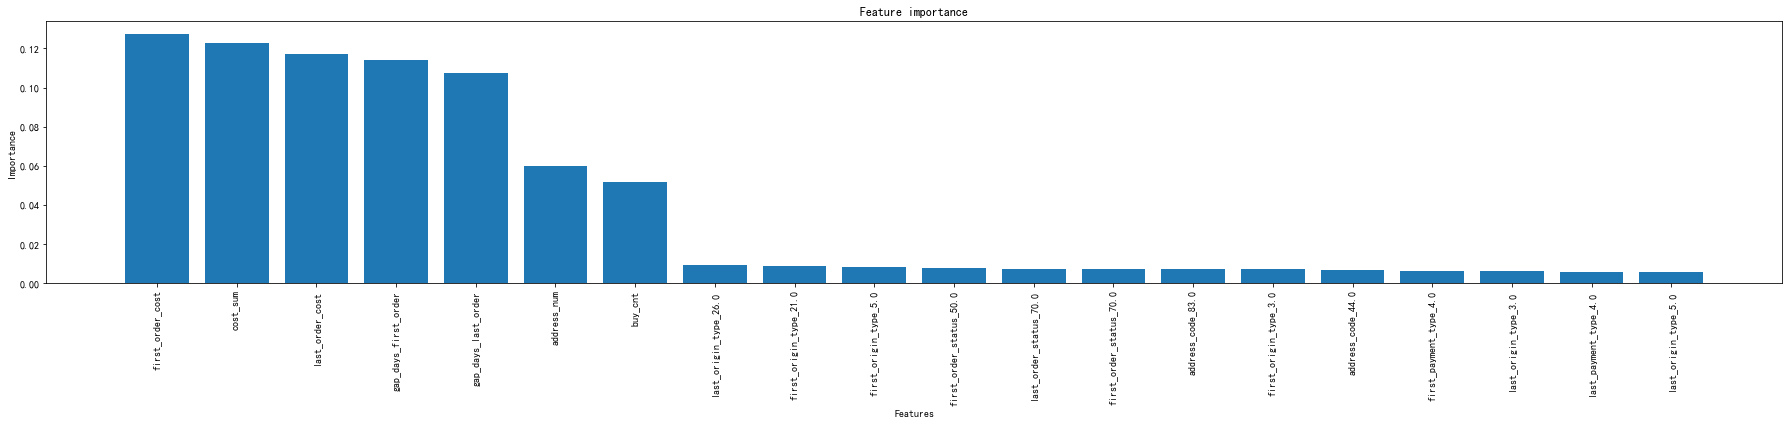

In [48]:
show_features_importance_bar(df['feature_name'][:20], df['importance'][:20])

In [40]:
import requests

def split_all_text(response_text):
    idx_right = -1
    outcome = {}

    while True:
        start_idx = idx_right + 1
        idx_left = response_text.find('"', start_idx)
        if idx_left==-1:
            break

        start_idx = idx_left + 1
        idx_right = response_text.find('"', start_idx)
        if idx_right==-1:
            break

        buy_user_id = response_text[idx_left+1:idx_right-1]

        start_idx = idx_right + 1
        idx_left = response_text.find('"', start_idx)
        if idx_left==-1:
            break

        start_idx = idx_left + 1
        idx_right = response_text.find('"', start_idx)
        if idx_right==-1:
            break

        score = float(response_text[idx_left+1:idx_right-1])
        outcome[buy_user_id] = score

    return outcome

url_get_by_ids = 'http://172.17.30.36:9003/callcenter/v1/get_possibility_by_user_ids'
user_ids_lst = ['99C0972D-B1EC-4000-824F-462791D433F7', '9850E2BD-C649-41B7-A543-B6E20D0CF8E2']

response = requests.get(url_get_by_ids,
                        params={'user_ids':user_ids_lst})
print('get by ids response.text', response.text)

outcome = split_all_text(response.text)
print('outcome is ', outcome)

get by ids response.text [{"9850E2BD-C649-41B7-A543-B6E20D0CF8E2":"0.9811545482039103","99C0972D-B1EC-4000-824F-462791D433F7":"0.9806657000225958"}]
outcome is  {'9850E2BD-C649-41B7-A543-B6E20D0CF8E': 0.98115454820391, '99C0972D-B1EC-4000-824F-462791D433F': 0.980665700022595}


In [43]:
url_get_all = 'http://172.17.30.36:9003/callcenter/v1/get_all_possibility'

start_t = time.time()

response = requests.get(url_get_all, params={}, timeout=100)
print('get by all finished! ', len(response.text))

# print('get by all response.text ', response.text)

outcome = split_all_text(response.text)

end_t = time.time()
print('outcome is ', len(outcome), 
      'cost time: ', end_t-start_t)

get by all finished!  151542734
outcome is  2467496 cost time:  27.08603286743164


In [42]:
outcome

{'6BDB1611-4CE6-4E32-8C15-F22A5767286': 0.007054328878021624,
 'F6505BD2-A0F2-4CAC-878B-2CC0CA7DB07': 0.0665770075182953,
 '190E3A34-EADF-43EB-8B52-F63ABC22DEA': 0.070198991860217,
 '88D55C48-79D4-4F8D-BD24-52A0BCD99E8': 0.0159363653248884,
 'A9ABA15A-7D7B-463A-89BE-B2C793B8295': 0.000914677809869826,
 'D469E64B-A530-4F4F-8FDF-F5AF09A3F29': 0.1794280972450839,
 '59D16FE8-8339-48FA-B634-70506072CE7': 0.0613577963919413,
 'CF463EC1-65D7-4D3C-A5D0-8D5D0F1E4F4': 0.02301652600829146,
 '88B8D88B-BAD5-4A92-881E-612C3D40861': 0.0451473139271837,
 'CD115DA0-A687-4FAE-B145-345BCE4C57B': 0.00721108584572116,
 '83736872-A3AF-43A8-AA13-4690955D199': 0.0461181440346463,
 'C95BF3BE-1981-4D37-A8DB-299790EDC9D': 0.01513275574932094,
 '05AAE8AB-3967-4568-A24F-B760AF4EF33': 0.01175288377830821,
 '27F11384-0BE6-4E45-8DCF-CA8004DC7D2': 0.02019042945403248,
 'B2C5BCC2-C692-4889-9D8D-EE199775896': 0.093935771353584,
 '8DE9EF8E-6317-46D6-8167-81A8D637FEF': 0.02267280977471465,
 '24E57B9B-C5E7-4FB1-A43E-1C57BA

In [ ]:
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [30]:
current_datetime_str = time.strftime('%Y-%m-%d 00:00:00', time.localtime(time.time()))
current_datetime_str

'2019-03-18 00:00:00'

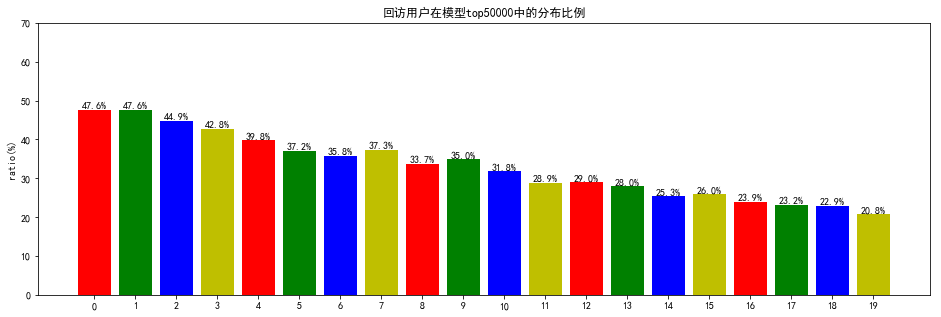

In [26]:
ratio_list = [
    0.4764, 0.4764, 0.4488, 0.4276, 0.3976, 0.3716, 0.3576, 0.3728, 0.3372, 0.35, 
    0.3176, 0.2892, 0.29, 0.2804, 0.2532, 0.26, 0.2388, 0.2316, 0.2292, 0.2084]

ratio_list = [ratio*100.0 for ratio in ratio_list]

import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


# Microsoft YaHei

fig=plt.figure(figsize=(16,5))
 
name_list = [str(i) for i in range(20)]
rects= plt.bar(range(len(ratio_list)), ratio_list, color='rgby')


index = list(range(20))
plt.ylim(ymax=70, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("ratio(%)") #X轴标签
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 1))+'%', ha='center', va='bottom')
    
plt.title('回访用户在模型top50000中的分布比例')

plt.show()

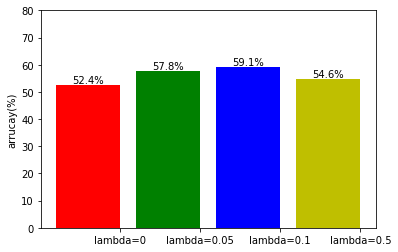

In [6]:
import matplotlib.pyplot as plt
 
name_list = ['lambda=0', 'lambda=0.05', 'lambda=0.1', 'lambda=0.5']
num_list = [52.4, 57.8, 59.1, 54.6]
rects=plt.bar(range(len(num_list)), num_list, color='rgby')
# X轴标题
index=[0,1,2,3]
index=[float(c)+0.4 for c in index]
plt.ylim(ymax=80, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("arrucay(%)") #X轴标签
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height)+'%', ha='center', va='bottom')

plt.show()

In [2]:
def compute_distances_no_loops(X, X_train):
    dists = -2 * np.dot(X, X_train.T) + np.sum(X_train**2,    axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
    return dists

Automatically created module for IPython interactive environment


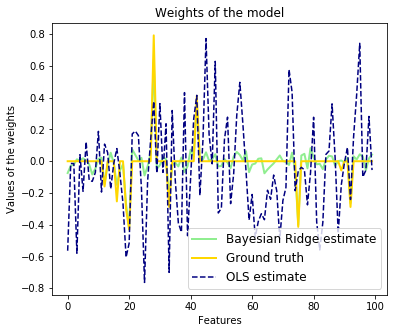

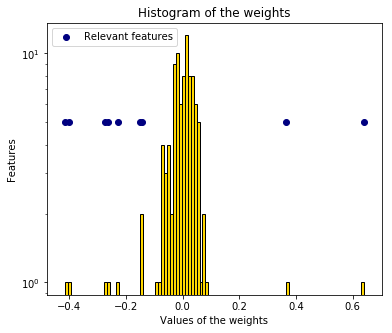

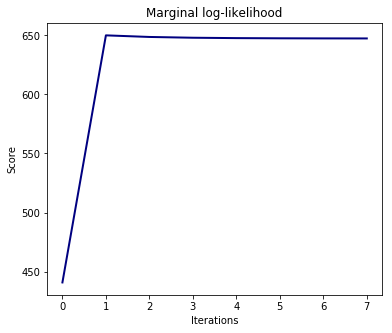

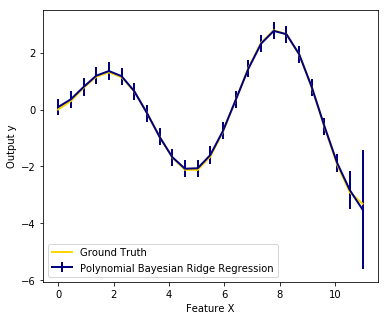

In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

start generate data!
before y.shape is  (10000,)
after y.shape is  (10000,)
generat num finished!


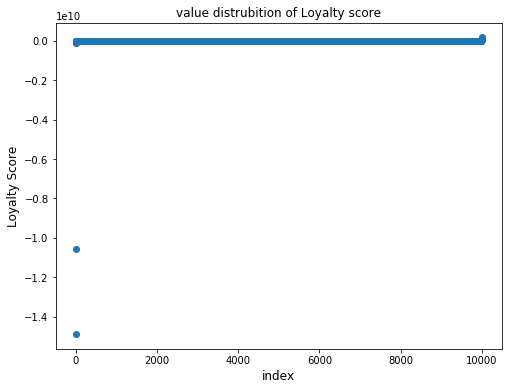

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression

def convert_y(y):
    y_new_val_lst = []
    bias = 0.099
    for y_val in y:
#         print('y_val is ', y_val)
        if y_val>=0.0:
            y_new_val = np.e**(y_val)/1
        else:
            y_new_val = -np.e**(-1*y_val)/1
#         y_new += bias
        y_new_val_lst.append(y_new_val)
    y_new = np.array(y_new_val_lst).T
#     y_new = np.clip(y_new, -20, 20)
    return y_new

def convert_back_y(y):
    y_new_val_lst = []
    bias = 0.099
    for y_val in y:
        if y_val<0:
            y_new_val = -np.log(-y_val*1)
        else:
            y_new_val = np.log(y_val*1)
        y_new_val_lst.append(y_new_val)
    y_new = np.array(y_new_val_lst).T
    return y_new

# #############################################################################
# Generating simulated data with Gaussian weights
print('start generate data!')

np.random.seed(0)
n_samples, n_features, n_features_used = 10000, 300, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.

w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, n_features_used)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(3))
# Create noise with a precision alpha of 50.

noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(80.), size=n_samples)
# Create the target
y = np.dot(X, w) + noise
print('before y.shape is ', y.shape)
y = convert_y(y)
print('after y.shape is ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('generat num finished!')

plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), np.sort(y))
plt.title("value distrubition of Loyalty score")
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

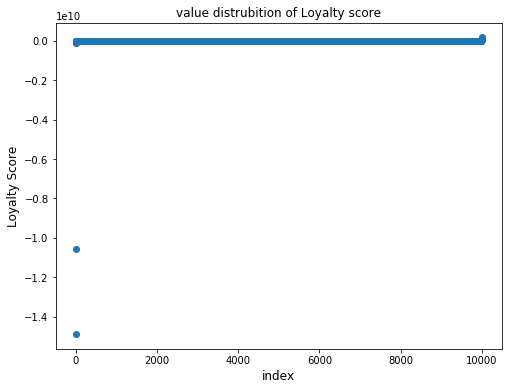

In [107]:
target_col = 'target'

plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), np.sort(y))
plt.title("value distrubition of Loyalty score")
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

In [108]:
y_train_origial = convert_back_y(y_train)

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
brr = BayesianRidge(compute_score=True)
brr.fit(X_train, y_train)
y_pred_brr = brr.predict(X_test)

print('brr with no convert rmse val is ', np.sqrt(mean_squared_error(y_pred_brr, y_test)))

brr = BayesianRidge(compute_score=True)
brr.fit(X_train, y_train_origial)
y_pred_brr = brr.predict(X_test)
y_pred_brr_coverted = convert_back_y(y_pred_brr)

print('brr with convert rmse val is ', np.sqrt(mean_squared_error(y_pred_brr_coverted, y_test)))

print('clf fit finished!')

ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
print('ols rmse val is ', np.sqrt(mean_squared_error(y_pred_ols, y_test)))

ols = LinearRegression()
ols.fit(X_train, y_train_origial)
y_pred_ols = ols.predict(X_test)
y_pred_ols_coverted = convert_back_y(y_pred_ols)
print('ols with convert rmse val is ', np.sqrt(mean_squared_error(y_pred_ols_coverted, y_test)))

print('ols fit finished!')
param_regressor = {
         'num_leaves': 101,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.007,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         'random_state': 2019
}

trn_data = lgb.Dataset(X_train, label=y_train)

# print('start regressor training...')
# lgb_model = lgb.train(param_regressor, trn_data, 500, verbose_eval=100)   
# y_pred_lgb = lgb_model.predict(X_test)
# print('lgb rmse val is ', np.sqrt(mean_squared_error(y_pred_lgb, y_test)))

# clf rmse val is  589956.9420349462
# clf fit finished!
# ols rmse val is  795307.2592917023
# ols fit finished!

4292015.400922055
2063346.6911373537
clf fit finished!
ols rmse val is  53089918.734005354
ols with convert rmse val is  2063346.6911366559


brr with no convert rmse val is  4292015.400922055
brr with convert rmse val is  2063346.6911373537
clf fit finished!
ols rmse val is  53089918.734005354
ols with convert rmse val is  2063346.6911366559
ols fit finished!


In [85]:
param_regressor = {
         'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.007,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         'random_state': 2019
}

X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

trn_data = lgb.Dataset(X_train_lgb, label=y_train_lgb)
val_data = lgb.Dataset(X_val_lgb, label=y_val_lgb)

num_round = 2000
print('start regressor training...')
lgb_model = lgb.train(param_regressor, trn_data, num_round, valid_sets = [trn_data, val_data], 
                verbose_eval=100, early_stopping_rounds = 200)
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
print('lgb rmse val is ', np.sqrt(mean_squared_error(y_pred_lgb, y_test)))

start regressor training...
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 1.65212e+06	valid_1's rmse: 3.52585e+06
[200]	training's rmse: 1.62586e+06	valid_1's rmse: 3.52687e+06
Early stopping, best iteration is:
[1]	training's rmse: 1.68144e+06	valid_1's rmse: 3.52472e+06
lgb rmse val is  589257.8442868937


In [52]:
noise.std()

0.09841108617204906

In [4]:
6.81*1.052

7.16412

In [42]:
vv = stats.norm.rvs(loc=0, scale=1. /5, size=500)

In [44]:
vv.mean(), vv.std()

(0.00918757583087531, 0.19374441906898218)

In [11]:
6.3/4.7-1.0

0.34042553191489344

In [12]:
53.6/42.1-1.0

0.27315914489311166

In [9]:
32.64*1.042

34.01088

In [1]:
12*18992.3/208000

1.0957096153846153

In [23]:
df1 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': [100., 50., -30., -50.]})

        
df2 = pd.DataFrame({'A': 1.,
                  'B': pd.Timestamp('20130102'),
                  'C': pd.Series(1, index=list(range(4)), dtype='float32')}) 

In [29]:
def new_func(df1, df2):
    for df in (df1, df2):
        df['c_new111'] = df['C']*0.77
new_func(df1, df2)

In [30]:
df2

,A,B,C,c_new,c_new111
0,1.0,2013-01-02,1.0,0.77,0.77
1,1.0,2013-01-02,1.0,0.77,0.77
2,1.0,2013-01-02,1.0,0.77,0.77
3,1.0,2013-01-02,1.0,0.77,0.77


In [28]:
X = np.array([[1, 2, 3], [2, 3, 5]])
X_train = np.array([1, 2, 3])

print('X.shape is', X.shape, 'X_train.shape is', X_train.shape)
# results = compute_distances_no_loops(X, X_train)

print(X-X_train)

np.linalg.norm(X-X_train, axis=1, ord=2), np.sqrt(6)

result = np.linalg.norm(X-X_train, axis=1, ord=2)
print(result==result.min())

# results
# from numpy.linalg import norm
# norm(X-(X_train[:, np.newaxis]), axis=0, ord=2)

X.shape is (2, 3) X_train.shape is (3,)
[[0 0 0]
 [1 1 2]]
[ True False]


In [ ]:
lst = [(1160, 7792), (693,2375), (369,961), 
       (301,871), (311,802), (218,656), (221,521)]
fork_num_lst = list(map(lambda x: x[1], lst))
print(fork_num_lst)

# fig = plt.figure(1) 

# #figure对象的add_axes()可以在其中创建一个axes对象,
# # add_axes()的参数为一个形如[left, bottom, width, height]的列表,取值范围在0与1之间;
# ax = fig.add_axes([0.1, 0.5, 0.8, 0.5]) # 我们把它放在了figure图形的上半部分，对应参数分别为：left, bottom, width, height;
# ax.set_xlabel('time')     #用axes对象的set_xlabel函数来设置它的xlabel

# line =ax.plot(range(5))[0]  #用axes对象的plot()进行绘图,它返回一个Line2D的对象;
# line.set_color('r')             # 再调用Line2D的对象的set_color函数设置color的属性;
# plt.show()

plt.plot(fork_num_lst)
plt.show()

In [39]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                   index=['falcon', 'parrot', 'lion', 'monkey'],
                   columns=('class', 'max_speed'))

# >>> df
#          class  max_speed
# falcon    bird      389.0
# parrot    bird       24.0
# lion    mammal       80.5
# monkey  mammal        NaN
df['aaa'] = [4, 5, 6, 8]

df

,class,max_speed,aaa
falcon,bird,389.0,4
parrot,bird,24.0,5
lion,mammal,80.5,6
monkey,mammal,NaN,8


In [37]:
# df.reset_index(name='new_col')

# (df.groupby('class')
#           .size()
#           .reset_index(name='transactions_count'))

x = np.arange(6).reshape((2,3))

x = np.array([[0, -100], [30, 22], [11, 44]])

print('x is', x)
np.ptp(x, axis=1)

x is [[   0 -100]
 [  30   22]
 [  11   44]]


array([100,   8,  33])

In [19]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.var_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[0.25 0.25]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


In [17]:
tol_lst = [0.001, 0.01, 0.1]
alpha_1_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
alpha_2_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
lambda_1_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
lambda_2_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
normalize_lst = [True, False]

import itertools
itertools.combinations(tol_lst,2)

import itertools
a = [[1,2,3],[4,5,6],[7,8,9,10]] # 3*3*4
ll = list(itertools.product(*a))
ll = list(itertools.product(tol_lst, alpha_1_lst, normalize_lst))

for tol, alpha, normalize in itertools.product(tol_lst, alpha_1_lst, normalize_lst):
    print('tol ', tol, 'alpha ', alpha, 'normalize ', normalize)
# print(ll)
print('len of ll is ', len(ll))

tol  0.001 alpha  1e-06 normalize  True
tol  0.001 alpha  1e-06 normalize  False
tol  0.001 alpha  1e-05 normalize  True
tol  0.001 alpha  1e-05 normalize  False
tol  0.001 alpha  0.0001 normalize  True
tol  0.001 alpha  0.0001 normalize  False
tol  0.001 alpha  0.001 normalize  True
tol  0.001 alpha  0.001 normalize  False
tol  0.001 alpha  0.01 normalize  True
tol  0.001 alpha  0.01 normalize  False
tol  0.001 alpha  0.1 normalize  True
tol  0.001 alpha  0.1 normalize  False
tol  0.01 alpha  1e-06 normalize  True
tol  0.01 alpha  1e-06 normalize  False
tol  0.01 alpha  1e-05 normalize  True
tol  0.01 alpha  1e-05 normalize  False
tol  0.01 alpha  0.0001 normalize  True
tol  0.01 alpha  0.0001 normalize  False
tol  0.01 alpha  0.001 normalize  True
tol  0.01 alpha  0.001 normalize  False
tol  0.01 alpha  0.01 normalize  True
tol  0.01 alpha  0.01 normalize  False
tol  0.01 alpha  0.1 normalize  True
tol  0.01 alpha  0.1 normalize  False
tol  0.1 alpha  1e-06 normalize  True
tol  0.1 a

In [29]:
#coding=utf-8
from __future__ import print_function
from __future__ import division
# https://datawhatnow.com/feature-importance/
# https://github.com/Microsoft/LightGBM/issues/826

import pickle
import time
import gc
import os
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

random_seed = 42
np.random.seed(random_seed)

data_path = 'F:/liver_disease_patients_intelligent_segmentation/data/'
output_path = 'F:/liver_disease_patients_intelligent_segmentation/output/'

print('data_path is ', data_path)
print('output_path is ', output_path)

data_path is  F:/liver_disease_patients_intelligent_segmentation/data/
output_path is  F:/liver_disease_patients_intelligent_segmentation/output/


in get_training_data()
buy_user_id      0
creation_date    0
is_pos           0
dtype: int64
df_merged.shape is  (2846662, 3)
df_merged shape is  (800000, 3)
df_merged dtypes is  buy_user_id              object
creation_date    datetime64[ns]
is_pos                    int64
dtype: object
df_merged.shape after add frequency is  (800000, 4)
df_merged.shape after add monetary is  (800000, 5)
df_merged.shape after add first order is  (800000, 10)
df_merged.shape after add last order is  (800000, 15)
df_merged.shape after add address code is  (800000, 16)
df_merged.shape after add start_app count, branch_code code is  (800000, 18)
df_merged.shape after add address number feature is  (800000, 19)
after all preprocessing, final df_merged.dtypes is  buy_user_id                     object
creation_date           datetime64[ns]
is_pos                           int64
buy_cnt                        float64
cost_sum                       float64
first_order_cost               float64
first_origin_t

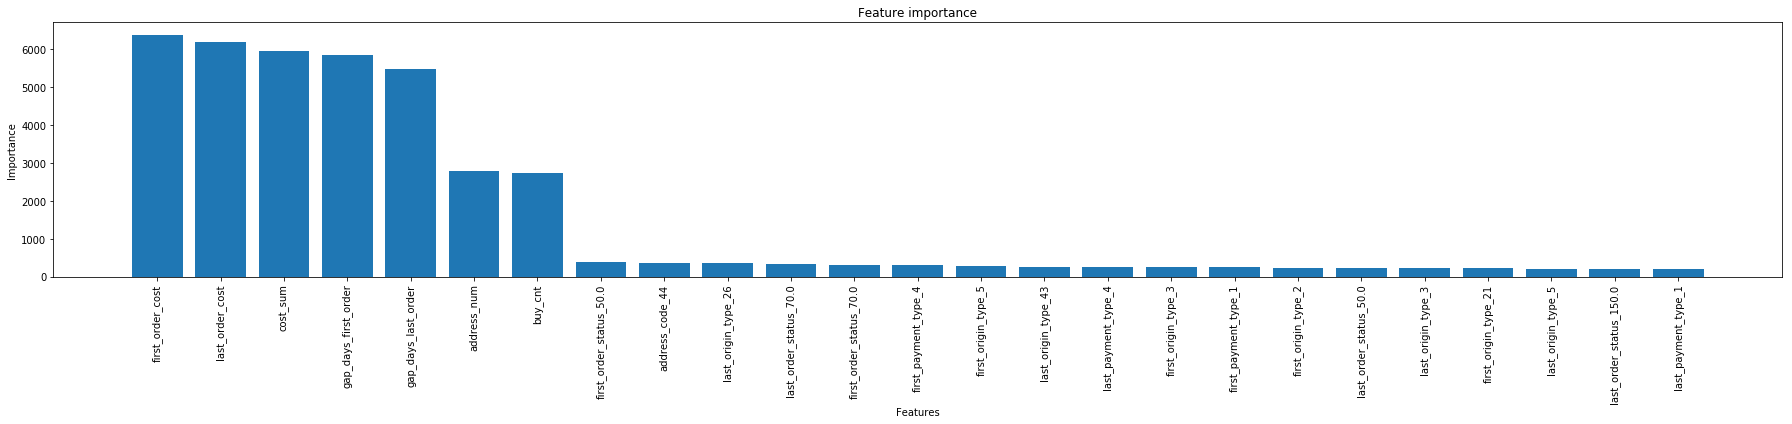

program ends


In [35]:
def show_features_importance_bar(features, feature_importance):
    df_feat_importance = pd.DataFrame({
            'column': features,
            'importance': feature_importance,
        }).sort_values(by='importance', ascending=False)
    df_feat_importance.to_csv(output_path + '/df_feat_importance.csv', index=0, sep='\t')

    plt.figure(figsize=(25, 6))
    #plt.yscale('log', nonposy='clip')
    plt.bar(range(len(feature_importance)), feature_importance, align='center')
    plt.xticks(range(len(feature_importance)), features, rotation='vertical')
    plt.title('Feature importance')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

def convert_2_md5(value):
    return hashlib.md5(str(value).encode('utf-8')).hexdigest()
    # return hashlib.md5(str(value)).hexdigest()

def split_by_user_id(df_merged, train_ratio=0.67):
    df_merged['md5_val'] = df_merged['buy_user_id'].apply(convert_2_md5)
    # df_merged['md5_val'] = df_merged['md5_val'].apply(str)
    print('df_merged.dtypes is ', df_merged.dtypes)

    df_user_id_md5_val = pd.DataFrame()
    df_user_id_md5_val['md5_val'] = df_merged['md5_val'].sort_values(ascending=True)

    # df_merged_sorted = df_merged.sort_values(by=['md5_val'])
    # print('df_merged_sorted head is ', df_merged_sorted.head(5))

    # df_merged_sorted.to_csv('./data/hive_sql_merged_instances_sorted.csv', 
    #     sep='\t', date_format='%Y/%m/%d', index=0)  # date_format='%Y-%m-%d %H:%M:%s'
    train_num = int(df_merged.shape[0]*train_ratio)
    print('train_num is ', train_num)
    pivot_val = df_user_id_md5_val['md5_val'][train_num]

    print('train_num is: ', train_num, 'pivot_val is: ', pivot_val,
          'type of pivot_val is', type(pivot_val))

    # df_merged_train = df_merged_sorted[df_merged_sorted['md5_val']<=pivot_val]
    # df_merged_test = df_merged_sorted[df_merged_sorted['md5_val']>pivot_val]

    df_merged_train = df_merged.loc[df_merged['md5_val'] <= pivot_val]
    df_merged_test = df_merged.loc[df_merged['md5_val'] > pivot_val]

    print('after split df_merged_train.shape is ', df_merged_train.shape,
          'df_merged_test.shape is ', df_merged_test.shape)

    # df_merged_train = df_merged_sorted[:train_num]
    # df_merged_test = df_merged_sorted[train_num:]

    # df_merged_train.to_csv('./data/hive_sql_merged_instances_train.csv', sep='\t', index=0)
    # df_merged_test.to_csv('./data/hive_sql_merged_instances_test.csv', sep='\t', index=0)

    return df_merged_train, df_merged_test


def compute_density_multiple(y_true, y_predict, threshold=10, by_percentage=True, top=True):
    df = pd.DataFrame({'y_true': y_true, 'y_predict': y_predict})
    df.sort_values(by=['y_predict'], ascending=False, inplace=True)

    density_whole = sum(df['y_true'])/df.shape[0]
    if by_percentage:
        if top:
            df_target = df[:int(threshold*0.01*df.shape[0])]
        else:
            df_target = df[-int(threshold*0.01*df.shape[0]):]
    else:
        if top:
            df_target = df[:threshold]
        else:
            df_target = df[-threshold:]
    density_partial = sum(df_target['y_true'])/df_target.shape[0]
    density_mutiple = density_partial/density_whole
    return density_mutiple

def generate_real_test_df_quick():
    df_test_real = pd.read_csv(data_path + '/hive_sql_unassigned_buyuser_output_processed.csv',
                               sep='\t')
    print('df_test_real.shape is ', df_test_real.shape)
    return df_test_real

def generate_real_test_df():
    print('in generate_real_test_df')

    df_test_real = pd.read_csv(data_path + '/hql_liver_merged_visits_instances_df_data.csv',
                               parse_dates=[1], infer_datetime_format=True,
                               names=['buy_user_id', 'creation_date', 'is_pos'])

    print('df_test_real.shape is ', df_test_real.shape)


    ###----------------------------###
    ###------ 加上F的feature  ----- ###
    ###----------------------------###
    df_frequency = pd.read_csv('./unassigned/data/hql_liver_F_data.csv', parse_dates=[1], infer_datetime_format=True)
    df_test_real = pd.merge(df_test_real, df_frequency, how='left', on=['buy_user_id', 'creation_date'])
    print('df_test_real.shape after add frequency is ', df_test_real.shape)
    del df_frequency

    ###----------------------------###
    ###------ 加上M的feature  -----###
    ###----------------------------###
    df_monetary = pd.read_csv('./unassigned/data/hive_sql_M_data.csv', parse_dates=[1], infer_datetime_format=True)
    df_test_real = pd.merge(df_test_real, df_monetary, how='left', on=['buy_user_id', 'creation_date'])
    print('df_test_real.shape after add monetary is ', df_test_real.shape)
    del df_monetary

    ###---------------------------------###
    ###   加上first order的features      ###
    ###   包含：                         ###
    ###   1. 订单距离电话回访时间的天数    ###
    ###   2. 订单金额                    ###
    ###   3. 订单来源                    ###
    ###   4. 订单支付方式                ###
    ###---------------------------------###
    df_first_order = pd.read_csv('./unassigned/data/hive_sql_first_order_data.csv', 
                                 parse_dates=[1, 2], infer_datetime_format=True,
                                 dtype={'first_origin_type': str, 'first_payment_type': str})
    df_first_order['gap_days_first_order'] = (df_first_order['creation_date'] - df_first_order['order_dt']).dt.days
    df_first_order.drop(['order_dt'], axis=1, inplace=True)
    df_test_real = pd.merge(df_test_real, df_first_order, how='left', on=['buy_user_id', 'creation_date'])
    print('df_test_real.shape after add first order is ', df_test_real.shape)
    del df_first_order

    ###---------------------------------###
    ###   加上last order的features       ###
    ###   包含：                         ###
    ###   1. 订单距离电话回访时间的天数    ###
    ###   2. 订单金额                    ###
    ###   3. 订单来源                    ###
    ###   4. 订单支付方式                ###
    ###---------------------------------###
    df_last_order = pd.read_csv('./unassigned/data/hive_sql_last_order_data.csv', 
                                parse_dates=[1, 2], infer_datetime_format=True,
                                dtype={'last_origin_type': str, 'last_payment_type': str})
    df_last_order['gap_days_last_order'] = (df_last_order['creation_date'] - df_last_order['order_dt']).dt.days
    df_last_order.drop(['order_dt'], axis=1, inplace=True)
    df_test_real = pd.merge(df_test_real, df_last_order, how='left', on=['buy_user_id', 'creation_date'])
    print('df_test_real.shape after add last order is ', df_test_real.shape)
    del df_last_order


    ###----------------------------###
    ###--- 收货地址省份的feature  --###
    ###----------------------------###
    df_address = pd.read_csv('./unassigned/data/hive_sql_address_data.csv', dtype={'rand_address_code': str})
    df_address.rename(columns={'rand_address_code':'address_code'}, inplace = True)
    # df_address['address_code'] = df_address['rand_address_code'].apply(str)
    # df_address.drop(['rand_address_code'], axis=1, inplace=True)
    df_test_real = pd.merge(df_test_real, df_address, how='left', on=['buy_user_id'])
    print('df_test_real.shape after add address code is ', df_test_real.shape)
    del df_address


    ###----------------------------------------------------------###
    ###------ 加上class_code 和 branch_code的feature -------------###
    ###----------------------------------------------------------###
    df_class_code = pd.read_csv('./unassigned/data/hive_sql_patient_class_data.csv', 
                                dtype={'class_code': str, 'branch_code': str})
    df_test_real = pd.merge(df_test_real, df_class_code, how='left', on=['buy_user_id'])
    print('df_test_real.shape after add class_code, branch_code code is ', df_test_real.shape)
    del df_class_code

    ###----------------------------------------------------------###
    ###------ 加上电话回访时间所在的月份的feature -----------------###
    ###----------------------------------------------------------###
    df_test_real['call_month'] = df_test_real['creation_date'].dt.month.apply(str)
    df_test_real['call_weekday'] = df_test_real['creation_date'].dt.weekday.apply(str)
    print('df_test_real.shape after add call_month call_weekday is ', df_test_real.shape)


    ###----------------------------###
    ###--- 收货地址个数的feature  --###
    ###----------------------------###
    df_address_num = pd.read_csv('./unassigned/data/hive_sql_address_num_data.csv')
    df_merged = pd.merge(df_test_real, df_address_num, how='left', on=['buy_user_id'])
    print('df_test_real.shape after add address number feature is ', df_test_real.shape)
    # print('df_test_real.dtypes after add address number feature is ', df_test_real.dtypes)
    del df_address_num

    start_t = time.time()
    df_test_real.to_csv('./unassigned/data/hive_sql_unassigned_buyuser_output_processed', 
                        index=False, sep='\t')    
    print('df_test_real store cost time:', time.time()-start_t)

    return df_test_real

def get_training_data_quick():
    print('in get_training_data_quick()')
    start_t = time.time()
    df_merged = pd.read_csv(data_path + '/df_merged_processed.csv')
    print('read df_merged from csv cost time: ', time.time()-start_t,
          'df_merged.shape:', df_merged.shape)
    return df_merged

def get_training_data():
    print('in get_training_data()')
    df_merged = pd.read_csv(data_path + '/hql_liver_merged_visits_instances_df_data.csv',
                            parse_dates=[1], infer_datetime_format=True)

    # df_merged['is_pos']= pd.to_numeric(df_merged['is_pos'], downcast='integer', errors='coerce')
    # df_merged['row_num'] = list(np.array(list(range(len(df_merged)))))
    # print('the row_num is ', df_merged.loc[df_merged.is_pos.isnull()]['row_num'])
#     print('df_merged.head(20) is ', df_merged.head(20))
    print(df_merged.isnull().sum())
    print('df_merged.shape is ', df_merged.shape)
    # df_merged['is_pos'] = df_merged['is_pos'].astype(np.int8)
                            # dtype={'is_pos': np.int8})
    # df_merged['is_pos'] = df_merged['is_pos'].map({'True': 1, 'False': 0})
    # df_merged['is_pos'] = df_merged['is_pos'].astype(np.int32)

    #抽样做训练集
    sample_num = 800000
    df_merged = df_merged.sample(n=sample_num, random_state=42)
    print('df_merged shape is ', df_merged.shape)
    print('df_merged dtypes is ', df_merged.dtypes)

    # return df_merged

    # split_by_user_id(df_merged)

    ###----------------------------###
    ###------ 加上R的feature  -----###
    ###----------------------------###
    # df_recency = pd.read_csv('./data/hive_sql_R_data.csv', parse_dates=[1, 2], infer_datetime_format=True)
    # df_recency = pd.read_csv('./data/hive_sql_R_data.csv')
    # df_recency['creation_date'] = pd.to_datetime(df_recency['creation_date'], 
    #     format='%Y-%m-%d %H:%M:%S', errors='ignore')
    # df_recency['recency_date'] = pd.to_datetime(df_recency['recency_date'], 
    #     format='%Y-%m-%d %H:%M:%S', errors='ignore')

    # df_recency['gap_days'] = (df_recency['creation_date'] - df_recency['recency_date']).dt.days
    # df_merged = pd.merge(df_merged, df_recency, how='left', on=['buy_user_id', 'creation_date'])
    # df_merged.drop(['recency_date'], axis=1, inplace=True)
    # print('df_merged.shape after add R is ', df_merged.shape)
    # print('df_merged.dtypes after add R is ', df_merged.dtypes)

    # df_merged.drop(['gap_days'], axis=1, inplace=True)

    ###----------------------------###
    ###------ 加上F的feature  ----- ###
    ###----------------------------###
    df_frequency = pd.read_csv(data_path + '/hql_liver_F_data.csv', parse_dates=[1],
                               infer_datetime_format=True)
    df_merged = pd.merge(df_merged, df_frequency, how='left', on=['buy_user_id', 'creation_date'])
    print('df_merged.shape after add frequency is ', df_merged.shape)
    # print('df_merged.dtypes after add frequency is ', df_merged.dtypes)
    del df_frequency


    ###----------------------------###
    ###------ 加上M的feature  -----###
    ###----------------------------###
    df_monetary = pd.read_csv(data_path + '/hql_liver_M_data.csv', parse_dates=[1],
                              infer_datetime_format=True)
    df_merged = pd.merge(df_merged, df_monetary, how='left', on=['buy_user_id', 'creation_date'])
    print('df_merged.shape after add monetary is ', df_merged.shape)
    # print('df_merged.dtypes after add monetary is ', df_merged.dtypes)
    del df_monetary




    ###---------------------------------###
    ###   加上first order的features      ###
    ###   包含：                         ###
    ###   1. 订单距离电话回访时间的天数    ###
    ###   2. 订单金额                    ###
    ###   3. 订单来源                    ###
    ###   4. 订单支付方式                ###
    ###---------------------------------###
    df_first_order = pd.read_csv(data_path + '/hql_liver_first_order_data.csv',
                                 parse_dates=[1, 2], infer_datetime_format=True,
                                 dtype={'first_origin_type': str, 'first_payment_type': str})
    df_first_order['gap_days_first_order'] = (df_first_order['creation_date'] - df_first_order['order_dt']).dt.days
    df_first_order.drop(['order_dt'], axis=1, inplace=True)
    df_merged = pd.merge(df_merged, df_first_order, how='left', on=['buy_user_id', 'creation_date'])
    print('df_merged.shape after add first order is ', df_merged.shape)
    # print('df_merged.dtypes after add first order is ', df_merged.dtypes)
    del df_first_order



    ###---------------------------------###
    ###   加上last order的features       ###
    ###   包含：                         ###
    ###   1. 订单距离电话回访时间的天数    ###
    ###   2. 订单金额                    ###
    ###   3. 订单来源                    ###
    ###   4. 订单支付方式                ###
    ###---------------------------------###
    df_last_order = pd.read_csv(data_path + '/hql_liver_last_order_data.csv',
                                parse_dates=[1, 2], infer_datetime_format=True,
                                dtype={'last_origin_type': str, 'last_payment_type': str})
    df_last_order['gap_days_last_order'] = (df_last_order['creation_date'] - df_last_order['order_dt']).dt.days
    df_last_order.drop(['order_dt'], axis=1, inplace=True)
    df_merged = pd.merge(df_merged, df_last_order, how='left', on=['buy_user_id', 'creation_date'])
    print('df_merged.shape after add last order is ', df_merged.shape)
    # print('df_merged.dtypes after add last order is ', df_merged.dtypes)
    del df_last_order



    ###----------------------------###
    ###--- 收货地址省份的feature  --###
    ###----------------------------###
    df_address = pd.read_csv(data_path + '/hql_liver_address_data.csv', dtype={'rand_address_code': str})
    df_address.rename(columns={'rand_address_code':'address_code'}, inplace = True)
    # df_address['address_code'] = df_address['rand_address_code'].apply(str)
    # df_address.drop(['rand_address_code'], axis=1, inplace=True)
    df_merged = pd.merge(df_merged, df_address, how='left', on=['buy_user_id'])
    print('df_merged.shape after add address code is ', df_merged.shape)
    # print('df_merged.dtypes after add address code is ', df_merged.dtypes)
    del df_address




    ###----------------------------------------------------------###
    ###------ 加上class_code 和 branch_code的feature -------------###
    ###----------------------------------------------------------###
    # df_class_code = pd.read_csv('./data/hive_sql_patient_class_data.csv',
    #                             dtype={'class_code': str, 'branch_code': str})
    # # df_class_code['class_code'] = df_class_code['class_code'].apply(str)
    # # df_class_code['branch_code'] = df_class_code['branch_code'].apply(str)
    # df_merged = pd.merge(df_merged, df_class_code, how='left', on=['buy_user_id'])
    # print('df_merged.shape after add class_code, branch_code code is ', df_merged.shape)
    # # print('df_merged.dtypes after add class_code, branch_code code is ', df_merged.dtypes)
    # del df_class_code


    ###----------------------------------------------------------###
    ###------ 加上start_app count的feature -----------------------###
    ###----------------------------------------------------------###
    # df_start_app_cnt = pd.read_csv('./data/hive_sql_startapp_cnt_data.csv')
    # df_start_app_cnt.rename(columns={'cnt':'start_app_cnt'}, inplace = True)
    # df_merged = pd.merge(df_merged, df_start_app_cnt, how='left', on=['buy_user_id', 'creation_date'])
    # print('df_merged.shape after add start_app count, branch_code code is ', df_merged.shape)
    # print('df_merged.dtypes after add start_app count, branch_code code is ', df_merged.dtypes)
    # del df_start_app_cnt


    ###----------------------------------------------------------###
    ###------ 加上电话回访时间所在的月份的feature -----------------###
    ###----------------------------------------------------------###
    df_merged['call_month'] = df_merged['creation_date'].dt.month.apply(str)
    df_merged['call_weekday'] = df_merged['creation_date'].dt.weekday.apply(str)
    print('df_merged.shape after add start_app count, branch_code code is ', df_merged.shape)
    # print('df_merged.dtypes after add start_app count, branch_code code is ', df_merged.dtypes)


    ###----------------------------###
    ###--- 收货地址个数的feature  --###
    ###----------------------------###
    df_address_num = pd.read_csv(data_path + '/hql_liver_address_num_data.csv')
    df_merged = pd.merge(df_merged, df_address_num, how='left', on=['buy_user_id'])
    print('df_merged.shape after add address number feature is ', df_merged.shape)
    # print('df_merged.dtypes after add address number feature is ', df_merged.dtypes)

    del df_address_num

    print('after all preprocessing, final df_merged.dtypes is ', df_merged.dtypes)

    start_t = time.time()
    df_merged.to_csv(data_path + '/df_merged_processed.csv', index=False)
    print('store df_merged to_csv cost time: ', time.time()-start_t)

    return df_merged

def training_model(df_merged, category_feas_onehot=False):
    if category_feas_onehot:
        print('pre get_dummies, df_merged.dtypes: ', df_merged.dtypes)
        df_merged = pd.get_dummies(df_merged,
                                   columns=['address_code', 'call_month', 'call_weekday',
                                            'first_payment_type', 'first_origin_type',
                                            'last_payment_type', 'last_origin_type',
                                            'first_order_status', 'last_order_status'])
                                   # sparse=True)

        # print('after get_dummies, df_merged.dtypes: ', df_merged.dtypes)

    df_merged_train, df_merged_test = split_by_user_id(df_merged, train_ratio=0.67)
    del df_merged

    df_merged_train.drop(['buy_user_id', 'creation_date', 'md5_val'], axis=1, inplace=True)
    df_merged_test.drop(['buy_user_id', 'creation_date', 'md5_val'], axis=1, inplace=True)

    print('df_merged_train.shape df_merged_test.shape: ', df_merged_train.shape, df_merged_test.shape)

    df_train_y = df_merged_train['is_pos']
    df_train_X = df_merged_train.drop(['is_pos'], axis=1)

    df_test_y = df_merged_test['is_pos']
    df_test_X = df_merged_test.drop(['is_pos'], axis=1)

    feature_names = df_train_X.columns.tolist()

    if category_feas_onehot:
        d_train = lgb.Dataset(df_train_X.values, label=df_train_y.values, feature_name=feature_names)
    else:
        d_train = lgb.Dataset(df_train_X.values, label=df_train_y.values, feature_name=feature_names,
                              categorical_feature=['address_code', 'call_month', 'call_weekday',
                                                   'first_payment_type', 'first_origin_type',
                                                   'last_payment_type', 'last_origin_type',
                                                   'first_order_status', 'last_order_status'])

    # branch_code, class_code
    # y_pred.shape is  (263994,)
    # auc_score is  0.8494185939558818 predict cost time: 5.660183906555176

    params = {'learning_rate': 0.08, 'boosting_type': 'gbdt', 'objective': 'binary',
              'metric': 'binary_logloss', 'sub_feature': 0.85, 'sub_sample': 0.7,
              'num_leaves': 100, 'min_data': 400, 'max_depth': 13, 'random_state': 42}

    # lgbm = lgb.LGBMClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.08,
    #                          random_state=42, max_depth=13, min_child_samples=400,
    #                          num_leaves=100, subsample=0.7, colsample_bytree=0.85,
    #                          silent=-1, verbose=-1, boosting_type='gbdt')

    print('lgb training starts')
    start_t = time.time()
    clf = lgb.train(params, d_train, 500)
    print('lgb training ends, cost time', time.time() - start_t)

    start_t = time.time()
    y_pred = clf.predict(df_test_X.values)
    print('y_pred.shape is ', y_pred.shape)
    auc_score = roc_auc_score(df_test_y, y_pred)
    print('auc_score is ', auc_score, 'predict cost time:', time.time() - start_t)
    #
    # print('top 200 ratio_multiple is',
    #       compute_density_multiple(df_test_y, y_pred, threshold=200, by_percentage=False),
    #       'top 500 ratio_multiple is',
    #       compute_density_multiple(df_test_y, y_pred, threshold=500, by_percentage=False),
    #       'ratio_multiple top 1 is ',
    #       compute_density_multiple(df_test_y, y_pred, threshold=1),
    #       'ratio_multiple top 5 is ',
    #       compute_density_multiple(df_test_y, y_pred, threshold=5),
    #       'ratio_multiple top 10 is ',
    #       compute_density_multiple(df_test_y, y_pred, threshold=10),
    #       'ratio_multiple top 20 is ',
    #       compute_density_multiple(df_test_y, y_pred, threshold=20),
    #       'ratio_multiple top 30 is',
    #       compute_density_multiple(df_test_y, y_pred, threshold=30)
    # )

    importance = clf.feature_importance(importance_type='split')
    feature_name = clf.feature_name()
    feature_importance = pd.DataFrame({
        'feature_name': feature_name,
        'importance': importance}
    ).sort_values(by='importance', ascending=False)
    feature_importance.to_csv(output_path + '/lgb_feat_importance_split.csv', index=False)

    show_features_importance_bar(feature_importance['feature_name'][:25],
                                 feature_importance['importance'][:25])
    return feature_importance

def align_test_data_with_train_data(test_df, train_feas_columns):
    missing_cols = set(train_feas_columns) - set(test_df.columns)
    for c in missing_cols:
        test_df[c] = 0
    test_df = test_df[train_feas_columns]
    return test_df


df_merged = get_training_data()
# df_merged = get_training_data_quick()
print('df_merged.shape is ', df_merged.shape)
feature_importance_out = training_model(df_merged, category_feas_onehot=True)
print('program ends')

# importance = clf.feature_importance(importance_type='gain')
# feature_name = clf.feature_name()
# feature_importance = pd.DataFrame({
#                          'feature_name':feature_name,
#                          'importance':importance}
#                      ).sort_values(by='importance', ascending=False)
# feature_importance.to_csv('./model_output/lgb_feat_importance_gain.csv',index=False)

# plt.figure(figsize=(12,6))
# lgb.plot_importance(clf, max_num_features=30,  importance_type='split')
# plt.show()
# plt.savefig('./lgbm_importances.png')
#
# del df_train_y, df_train_X, df_test_y, df_test_X, df_merged_train, df_merged_test
# gc.collect()
#
#
# ###########################################################################################

# df_test_real = generate_real_test_df()
# print('finished!')

# df_test_real = generate_real_test_df_quick()
# print('after generate_real_test_df df_test_real shape is ', df_test_real.shape)
#
# final_outcome = pd.DataFrame()
# final_outcome['buy_user_id'] = df_test_real['buy_user_id']
# df_test_real.drop(['buy_user_id', 'creation_date'], axis=1, inplace=True)
#
# print('start real_test!!! ')
# start_t = time.time()
# y_pred=clf.predict(df_test_real.values)
# final_outcome['y'] = y_pred
# # final_outcome['y'] = np.round(y_pred, 8)
# print('y_pred.shape is ', y_pred.shape, 'df_test_real.shape is ', df_test_real.shape)
# print('final predict cost time:', time.time()-start_t)
#
# final_outcome.sort_values(by='y', ascending=False, inplace=True)
# final_outcome.to_csv('./model_output/final_outcome.csv', index=False, sep='\t')



In [46]:
feature_importance_out['importance'][:7].sum()/feature_importance_out['importance'].sum()

# (1079808, 269) (249612, 269)

373705 + 755964

#  (199751, 19) df_merged.shape is  (1129669, 19)
    
199751/(199751 + 1129669)


y_pred.shape is  (198221,) model predict cost time:  4.6558146476745605
predict auc_score is  0.8541811797702418
get outcome finished!
program ends

# y_pred.shape is  (373705,)
# auc_score is  0.8534907375048523 predict cost time: 9.141904592514038
# pickle dump finished, cost time:  0.16290831565856934

# df_check.shape is  (198221, 19) df_merged.shape is  (1131199, 19)

#   (754824, 263) df_merged_test.shape is  (376375, 263)
754824 + 376375

1131199

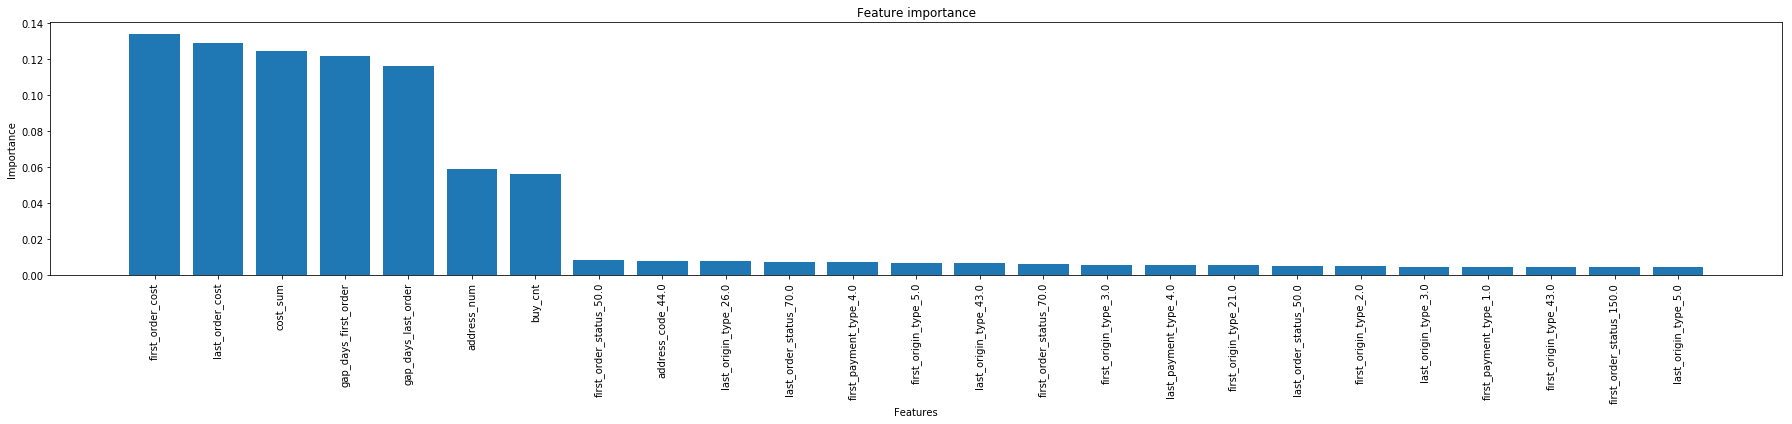

In [28]:













feature_importance_out_bakup = feature_importance_out.copy()

feature_importance_out['feature_name'][:7]

def show_features_importance_bar_new(features, feature_importance):
    df_feat_importance = pd.DataFrame({
            'column': features,
            'importance': feature_importance,
        }).sort_values(by='importance', ascending=False)
    df_feat_importance.to_csv(output_path + '/df_feat_importance.csv', index=0, sep='\t')

    plt.figure(figsize=(25, 6))
    #plt.yscale('log', nonposy='clip')
    plt.bar(range(len(feature_importance)), feature_importance, align='center')
    plt.xticks(range(len(feature_importance)), features, rotation='vertical')
    plt.title('Feature importance')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

    feature_importance_out
feature_importance_out['importance'] = feature_importance_out_bakup['importance']/feature_importance_out_bakup['importance'].sum()
show_features_importance_bar_new(feature_importance_out['feature_name'][:25],
                                 feature_importance_out['importance'][:25])

In [20]:


667395/(667395+132605)

0.83424375

In [ ]:
# 测试 bayes ridge regression回归
from sklearn.linear_model import BayesianRidge, LinearRegression

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE_TSG)
# folds = KFold(n_splits=5, shuffle=True, random_state=15)

oof_regressor_brr = np.zeros(len(df_train))
brr_predictions = np.zeros(len(df_test))

def norm_df(df):
    print('in norm_df')
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm

def fill_with_mean(df, feas):
    print('in fill_with_mean')
    for fea in feas:
        df[fea].fillna(df[fea].mean(), inplace=True)
    return df
    
start = time.time()
# brr = BayesianRidge(n_iter=1000, verbose=True) 
brr = BayesianRidge(n_iter=1000, tol=1e-6, alpha_1=1e-05, alpha_2=1e-05, verbose=True) 

df_train_brr = df_train.copy()
df_test_brr = df_test.copy()

# df_train_brr = df_train_brr.fillna(0.0)
# df_test_brr = df_test_brr.fillna(0.0)

print('start fill with mean')

df_train_brr = fill_with_mean(df_train_brr, features)
df_test_brr = fill_with_mean(df_test_brr, features)

print('start norm')

df_train_brr[features] = norm_df(df_train_brr[features])
df_test_brr[features] = norm_df(df_test_brr[features])

print('ending norm')

print('start bayes ridge regression training')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train['outliers'].values)):
    print("fold n°{}".format(fold_))
    brr.fit(df_train_brr.iloc[trn_idx][features], df_train_brr['target'].iloc[trn_idx])
    oof_regressor_brr[val_idx] = brr.predict(df_train_brr.iloc[val_idx][features])
    brr_predictions += brr.predict(df_test_brr[features].values) / 5.
    print('final rmse val is ', np.sqrt(mean_squared_error(df_train_brr.iloc[val_idx]['target'].values, 
                                                           oof_regressor_brr[val_idx])))
    
print('final brr rmse val is ', np.sqrt(mean_squared_error(df_train_brr['target'].values, oof_regressor_brr)))

# start norm
# ending norm
# start bayes ridge regression training
# fold n°0
# final rmse val is  3.806076950362962
# fold n°1
# final rmse val is  3.779403705505596
# fold n°2
# final rmse val is  150.34690570346518
# fold n°3
# final rmse val is  3.7754369642818877
# fold n°4
# final rmse val is  4.4753798374860585
# final brr rmse val is  67.33055964373135

#################################################
# fill with 0 normal
# fold n°0
# final rmse val is  3.773954411258298
# fold n°1
# final rmse val is  3.759998900810395
# fold n°2
# final rmse val is  3.7582380865818834
# fold n°3
# final rmse val is  3.7558625132092125
# fold n°4
# final rmse val is  3.7688611690916343
# final brr rmse val is  3.7633893292642013

################################################
# fill with mean normal

# start bayes ridge regression training
# fold n°0
# final rmse val is  3.7732907463257748
# fold n°1
# final rmse val is  3.758590156304969
# fold n°2
# final rmse val is  3.7565954722634456
# fold n°3
# final rmse val is  3.7551300147222824
# fold n°4
# final rmse val is  3.767392908342587
# final brr rmse val is  3.7622063927908376

In [125]:
X_test.fillna(X_test.mean())

X_test = np.array([[1, 2, np.nan], [2, np.nan, 3], [4, 5, 7], [np.nan, 3, 3]])
X_test

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [19]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  columns=['A', 'B', 'C'])

df
df.iat[2, 2] = 'abc'
print(df)
print(type(df.iat[2, 2]), df.dtypes)

ValueError: invalid literal for int() with base 10: 'abc'

In [110]:
def is_prime_num(num):
    import math
    for i in range(2, int(math.sqrt(num))):
        if num%i==0:
            print('i is ', i)
            return False
    return True

for num in range(100000, 200000, 1):
    if is_prime_num(num):
        print('num is ', num)
        break
        
# is_prime_num(10007)
print(is_prime_num(2333))
print(is_prime_num(2652124))

i is  2
i is  11
i is  2
num is  100003
True
i is  2
False


In [116]:
from sklearn.model_selection import RepeatedKFold, KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [3, 9]])
y = np.array([0, 0, 1, 1, 0])
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=2652124)
kf = KFold(n_splits=3, random_state=2652124)
# for train_index, test_index in rkf.split(X):
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3 4] TEST: [0 1]
TRAIN: [0 1 4] TEST: [2 3]
TRAIN: [0 1 2 3] TEST: [4]


In [124]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [77, 99], [88, 22], [11, 88]])
y = np.array([0, 1, 1, 0, 0, 1, 0])
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
for train_index, test_index in rskf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('#####################')

skf = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('#####################')
    
skf = StratifiedKFold(n_splits=3, random_state=21)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('#####################')
    
skf = StratifiedKFold(n_splits=3, random_state=2019)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 4 6] TEST: [0 1 3 5]
TRAIN: [0 1 3 5] TEST: [2 4 6]
TRAIN: [0 2 4] TEST: [1 3 5 6]
TRAIN: [1 3 5 6] TEST: [0 2 4]
#####################
TRAIN: [2 4 5 6] TEST: [0 1 3]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 3 4] TEST: [5 6]
#####################
TRAIN: [2 4 5 6] TEST: [0 1 3]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 3 4] TEST: [5 6]
#####################
TRAIN: [2 4 5 6] TEST: [0 1 3]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 3 4] TEST: [5 6]


## Comparison Operations


| Operation     | Description                       || Operation     | Description                          |
|---------------|-----------------------------------||---------------|--------------------------------------|
| ``a == b``    | ``a`` equal to ``b``              || ``a != b``    | ``a`` not equal to ``b``             |
| ``a < b``     | ``a`` less than ``b``             || ``a > b``     | ``a`` greater than ``b``             |
| ``a <= b``    | ``a`` less than or equal to ``b`` || ``a >= b``    | ``a`` greater than or equal to ``b`` |

What a silly question. Of course it's an error. 

But what about...

(Click the "output" button to see the answer)

Python has precedence rules that determine the order in which operations get evaluated in expressions like above. For example, `and` has a higher precedence than `or`, which is why the first expression above is `True`. If we had evaluated it from left to right, we would have calculated `True or True` first (which is `True`), and then taken the `and` of that result with `False`, giving a final value of `False`.

You could try to [memorize the order of precedence](https://docs.python.org/3/reference/expressions.html#operator-precedence), but a safer bet is to just use liberal parentheses. Not only does this help prevent bugs, it makes your intentions clearer to anyone who reads your code. 

For example, consider the following expression:

```python
prepared_for_weather = have_umbrella or rain_level < 5 and have_hood or not rain_level > 0 and is_workday
```

I'm trying to say that I'm safe from today's weather....
- if I have an umbrella...
- or if the rain isn't too heavy and I have a hood...
- otherwise, I'm still fine unless it's raining *and* it's a workday

But not only is my Python code hard to read, it has a bug. We can address both problems by adding some parentheses:

```python
for i in range(100):
    sum += i
    print(sum)
prepared_for_weather = have_umbrella or (rain_level < 5 and have_hood) or not (rain_level > 0 and is_workday)
```

You can add even more parentheses if you think it helps readability:

```python
prepared_for_weather = have_umbrella or ((rain_level < 5) and have_hood) or (not (rain_level > 0 and is_workday))
```

We can also split it over multiple lines to emphasize the 3-part structure described above:

```python
prepared_for_weather = (
    have_umbrella 
    or ((rain_level < 5) and have_hood) 
    or (not (rain_level > 0 and is_workday))
)
```